# [Quantum Fourier Transformation Code used from IBM's Qiskit Tutorials](https://qiskit.org/textbook/ch-algorithms/quantum-fourier-transform.html)

(Code modified from source)

In [1]:
import warnings
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit, execute, Aer, transpile
from qiskit.tools.monitor import job_monitor
from qiskit.circuit.library import QFT
from qiskit.visualization import plot_histogram, plot_bloch_multivector
warnings.filterwarnings("ignore", category=DeprecationWarning)
import numpy as np

pi = np.pi

In [2]:
def flip_endian(dict):
    newdict = {}
    for key in list(dict):
        newdict[key[::-1]] = dict.pop(key)
    return newdict

def set_measure_x(circuit, n):
    for num in range(n):
        circuit.h(num)

def set_measure_y(circuit, n):
    for num in range(n):
        circuit.sdg(num)
        circuit.h(num)

# Example that measures all qubits, consistent across all 3 versions

In [3]:
def qft_rotations(circuit, n):
    #if qubit amount is 0, then do nothing and return
    if n == 0:
        #set it to measure the x axis
        set_measure_x(qc, 4)
        qc.measure_all()
        return circuit
    n -= 1
    circuit.h(n)
    for qubit in range(n):
        circuit.cp(pi/2**(n-qubit), qubit, n)
    return qft_rotations(circuit, n)

backend = Aer.get_backend('aer_simulator') 
qc = QuantumCircuit(4)

qc.x(0)

qft_rotations(qc,4)#call the recursive qft method
#set it to measure the x axis
set_measure_x(qc, 4)

job = execute(qc, backend, shots=100000)#run the circuit 1000000 times
print(flip_endian(job.result().get_counts()))#return the result counts

{'1100': 40855, '1001': 1526, '1000': 41397, '1010': 6965, '1110': 6964, '1111': 298, '1101': 1704, '1011': 291}


# Example that prints statevector

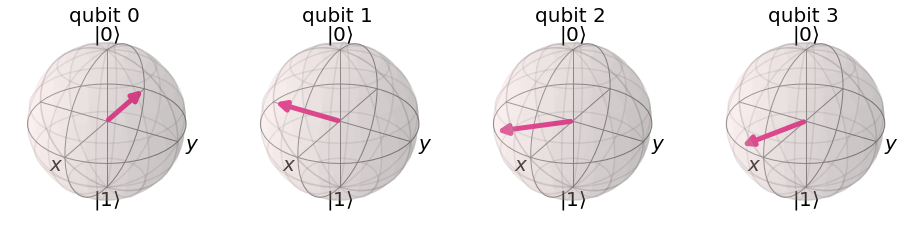

In [4]:
def qft_rotations(circuit, n):
    #if qubit amount is 0, then do nothing and return
    if n == 0:
        return circuit
    n -= 1
    circuit.h(n)
    for qubit in range(n):
        circuit.cp(pi/2**(n-qubit), qubit, n)
        #print(n)
        #print(qubit)
    return qft_rotations(circuit, n)

sim = Aer.get_backend('aer_simulator') 
q = QuantumRegister(4,'q')
c = ClassicalRegister(4,'c')
qc = QuantumCircuit(q,c)

qc.x(0)
qc.x(1)
qc.x(2)
qc.x(3)

qft_rotations(qc,4)#call the recursive qft method

qc.save_statevector()
statevector = sim.run(qc).result().get_statevector()
plot_bloch_multivector(statevector)

# Example that measures 1 selected qubit

In [5]:
backend = Aer.get_backend('aer_simulator') 
q = QuantumRegister(4,'q')
c = ClassicalRegister(1,'c')
qc = QuantumCircuit(q,c)

qc.x(0)

qft_rotations(qc,4)#call the recursive qft method
set_measure_x(qc, 4)
print(qc)

qc.measure(q[3],c)#select qubits registers to measure
job = execute(qc, backend, shots=1000000)#run the circuit 1000 times
dictRes = job.result().get_counts()#return the result counts
print(dictRes)

     ┌───┐                                                                ┌───┐»
q_0: ┤ X ├─■───────────────────────────────■──────────────────────■───────┤ H ├»
     └───┘ │                               │                ┌───┐ │P(π/2) ├───┤»
q_1: ──────┼────────■──────────────────────┼────────■───────┤ H ├─■───────┤ H ├»
           │        │                ┌───┐ │P(π/4)  │P(π/2) ├───┤         └───┘»
q_2: ──────┼────────┼────────■───────┤ H ├─■────────■───────┤ H ├──────────────»
     ┌───┐ │P(π/8)  │P(π/4)  │P(π/2) ├───┤                  └───┘              »
q_3: ┤ H ├─■────────■────────■───────┤ H ├─────────────────────────────────────»
     └───┘                           └───┘                                     »
c: 1/══════════════════════════════════════════════════════════════════════════»
                                                                               »
«     ┌───┐
«q_0: ┤ H ├
«     └───┘
«q_1: ─────
«          
«q_2: ─────
«          
«q_3: ─────
«          
«